In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.sankey import Sankey
import plotly.graph_objects as go
import seaborn as sns

# Pretty theme for matplotlib
plt.style.use("seaborn-v0_8-whitegrid")


In [15]:
# Load the data
df_arms = pd.read_csv('trade-register.csv', header=10,  encoding="latin")

In [16]:
df_arms

,Recipient,Supplier,Year of order,,Number ordered,.1,Weapon designation,Weapon description,Number delivered,.2,Year(s) of delivery,status,Comments,SIPRI TIV per unit,SIPRI TIV for total order,SIPRI TIV of delivered weapons
0,Afghanistan,Brazil,2017.0,NaN,6.0,NaN,EMB-314 Super Tucano,trainer/combat aircraft,6.0,NaN,2018,New,A-29B version; financed by USA; ordered via US...,4.50,27.0,27.0
1,Afghanistan,Soviet Union,1987.0,?,3.0,NaN,An-26,transport aircraft,3.0,NaN,1987,New,NaN,8.50,25.5,25.5
2,Afghanistan,Soviet Union,1988.0,?,40.0,?,2S9 120mm,self-propelled gun,40.0,NaN,1988,Second hand,Second-hand; aid; handed over by Soviet forces...,0.30,12.0,12.0
3,Afghanistan,Soviet Union,1979.0,?,6000.0,?,Malyutka,anti-tank missile,6000.0,NaN,1979; 1980; 1981; 1982; 1983; 1984; 1985; 1986...,New,Incl for Mi-24 helicopters and BMP-1 IFV,0.01,60.0,60.0
4,Afghanistan,Soviet Union,1988.0,?,13.0,?,9P113,surface-to-surface missile launcher,13.0,NaN,1988,Second hand,Second-hand,0.20,2.6,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29514,Zimbabwe,Russia,1998.0,?,6.0,NaN,Mi-24P/Mi-35P,combat helicopter,6.0,NaN,1999,Second hand,Second-hand; bought for use in DRC against reb...,3.60,21.6,21.6
29515,Zimbabwe,Italy,1967.0,?,20.0,?,Model-56 105mm,towed gun,20.0,NaN,1967,New,Supplier uncertain,0.45,9.0,9.0
29516,Zimbabwe,China,2004.0,?,5.0,?,Type-89/ZSD-89,APC,5.0,NaN,2004,New,ARV version,0.30,1.5,1.5
29517,Zimbabwe,Soviet Union,1975.0,?,15.0,?,T-34-85,tank,15.0,NaN,1975,Second hand,Second-hand; supplier uncertain,0.38,5.7,5.7


In [17]:
# Remove NaN for Year of order and dates before 1950
df_arms = df_arms.dropna(subset=['Year of order'])
df_arms = df_arms[df_arms['Year of order'] >= 1950]

In [18]:
# Look at the Ukraine data (as a recipient)
df_arms_ukraine = df_arms[df_arms['Recipient'] == 'Ukraine']
df_arms_ukraine

# Look at the US data (as a supplier)
df_arms_us = df_arms[df_arms['Supplier'] == 'United States']
df_arms_us

,Recipient,Supplier,Year of order,,Number ordered,.1,Weapon designation,Weapon description,Number delivered,.2,Year(s) of delivery,status,Comments,SIPRI TIV per unit,SIPRI TIV for total order,SIPRI TIV of delivered weapons
11,Afghanistan,United States,2012.0,NaN,71.0,NaN,M-1117 Guardian,APC,71.0,NaN,2014,New,$79 m deal; MSFV version,0.40,28.40,28.40
12,Afghanistan,United States,2011.0,NaN,240.0,NaN,M-1117 Guardian,APC,240.0,NaN,2012; 2013,New,$257 m deal; MSFV version; incl command; ARV; ...,0.40,96.00,96.00
13,Afghanistan,United States,2013.0,NaN,135.0,NaN,M-1117 Guardian,APC,135.0,?,2014; 2015,New,$113 m deal; MSFV version,0.40,54.00,54.00
14,Afghanistan,United States,2019.0,NaN,12.0,NaN,MD-500E,light helicopter,12.0,NaN,2020; 2021,New,Armed MD-530F version; Afghan designation Jengi,0.70,8.40,8.40
15,Afghanistan,United States,2019.0,?,55.0,?,M-1117 Guardian,APC,55.0,NaN,2020,New,Aid; MSFV version,0.40,22.00,22.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29350,Zambia,United States,2023.0,NaN,2.0,NaN,Enstrom-480,light helicopter,2.0,NaN,2024,New,Enstrom-480B version; incl for training,0.40,0.80,0.80
29361,Zambia,United States,2023.0,NaN,4.0,NaN,Bell-412,helicopter,1.0,NaN,2023,New,$80 m deal; aid; Bell-412EP version,5.00,20.00,5.00
29436,Zambia,United States,2015.0,NaN,4.0,NaN,aircraft engine,aircraft engine,4.0,NaN,2019,New,Allison AE-2100D3 (5000hp) turboprop for 2 C-2...,1.50,6.00,6.00
29466,Zimbabwe,United States,1967.0,?,1.0,NaN,Baron,light aircraft,1.0,NaN,1967,New,For VIP transport,0.70,0.70,0.70


<Axes: xlabel='Year of order'>

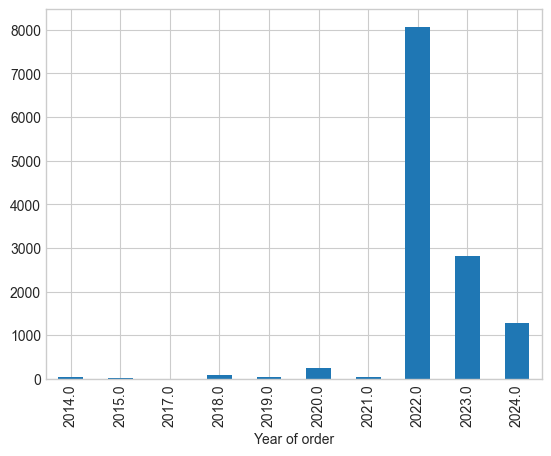

In [19]:
# Plot the evolution of SIPRI TIV of delivered weapons with Year of order as a barplot for ukraine
df_arms_ukraine.loc[:,'Year of order'] = df_arms_ukraine['Year of order'].astype(int)
df_arms_ukraine.loc[:,'SIPRI TIV of delivered weapons'] = df_arms_ukraine['SIPRI TIV of delivered weapons'].astype(float)
df_arms_ukraine.groupby('Year of order')['SIPRI TIV of delivered weapons'].sum().plot(kind='bar')

<Axes: xlabel='Year of order'>

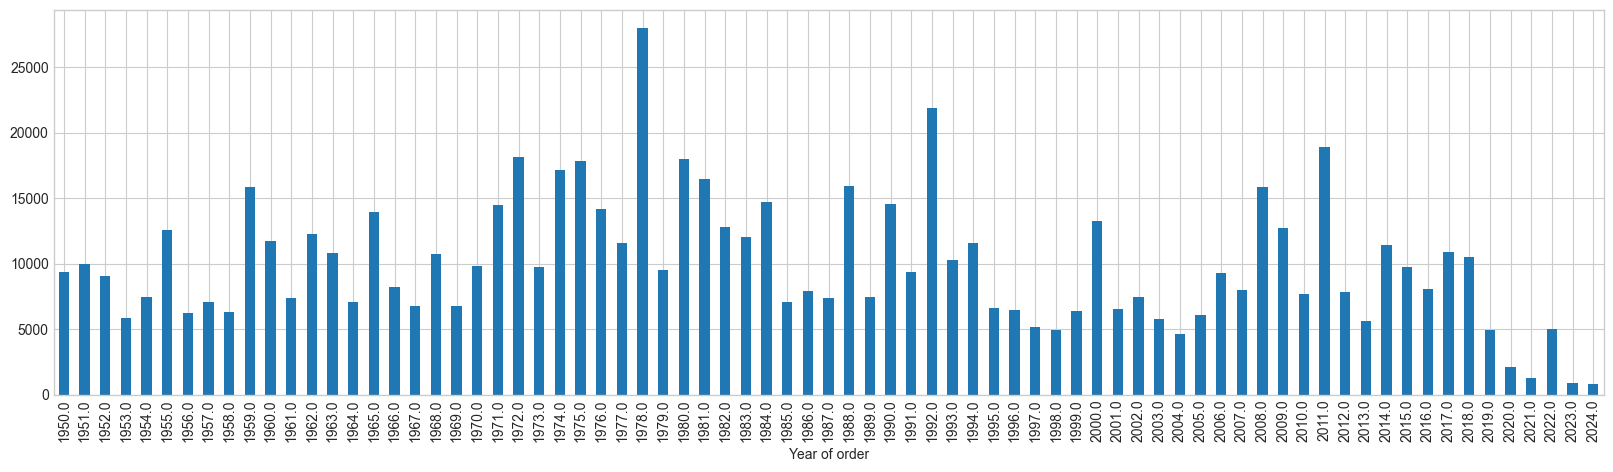

In [20]:
# Plot the evolution of SIPRI TIV of delivered weapons with Year of order as a barplot for US
df_arms_us.loc[:,'Year of order'] = df_arms_us['Year of order'].astype(int)
df_arms_us.loc[:,'SIPRI TIV of delivered weapons'] = df_arms_us['SIPRI TIV of delivered weapons'].astype(float)
df_arms_us.groupby('Year of order')['SIPRI TIV of delivered weapons'].sum().plot(kind='bar', figsize=(20,5))

In [25]:
# Filter for orders in 2024
df_arms_us_2023 = df_arms_us[df_arms_us['Year of order'] == 2023]

# Aggregate the delivered weapons by recipient
recipient_flows = df_arms_us_2023.groupby('Recipient')['SIPRI TIV of delivered weapons'].sum()

# Define the nodes: first node is 'US' and the rest are recipients
node_labels = ['US'] + list(recipient_flows.index)

# Define the links: all links originate from the 'US' node (index 0) and point to each recipient node.
sources = [0] * len(recipient_flows)
targets = list(range(1, len(recipient_flows) + 1))
values = list(recipient_flows)

# Create the Sankey diagram using Plotly
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.),
        label=node_labels,
        color="teal"  
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values
    )
)])

fig.update_layout(title_text="US Arms Sales in 2023", font_size=10)
fig.show()

<Axes: xlabel='Year of order'>

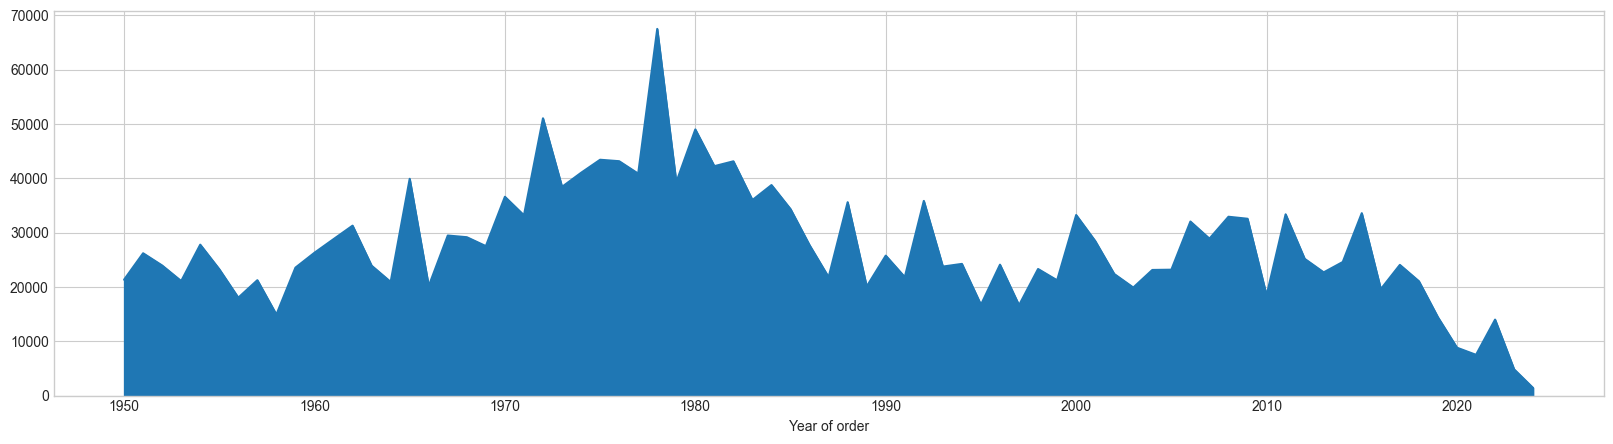

In [22]:
# Streamngraph of evolution of all arms sales (all suppliers and recipients) since 1950 (with matplotlib stackplot)
df_arms.loc[:,'Year of order'] = df_arms['Year of order'].astype(int)
df_arms.loc[:,'SIPRI TIV of delivered weapons'] = df_arms['SIPRI TIV of delivered weapons'].astype(float)
df_arms.groupby('Year of order')['SIPRI TIV of delivered weapons'].sum().plot(kind='area', figsize=(20,5))



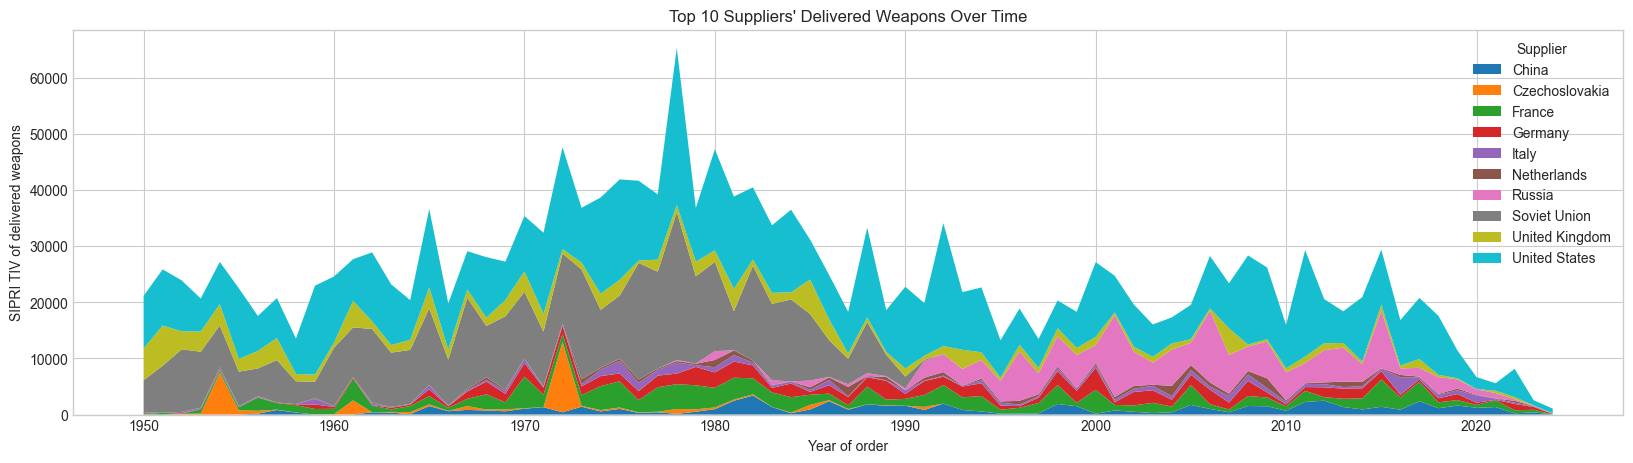

In [23]:
# Same streamgraph but colored by supplier countries, for top 10 suppliers, with matplotlib stackplot
# Identify the top 10 suppliers based on total delivered weapons
top_suppliers = df_arms.groupby('Supplier')['SIPRI TIV of delivered weapons'].sum().nlargest(10).index

# Filter the DataFrame for only the top suppliers
df_arms_top_suppliers = df_arms[df_arms['Supplier'].isin(top_suppliers)]

# Pivot the data: index = Year of order, columns = Supplier, values = delivered weapons sum
pivot_data = df_arms_top_suppliers.pivot_table(
    index='Year of order',
    columns='Supplier',
    values='SIPRI TIV of delivered weapons',
    aggfunc='sum'
).fillna(0).sort_index()

# Create the stackplot
plt.figure(figsize=(20,5))
plt.stackplot(pivot_data.index, pivot_data.T, labels=pivot_data.columns)
plt.xlabel("Year of order")
plt.ylabel("SIPRI TIV of delivered weapons")
plt.title("Top 10 Suppliers' Delivered Weapons Over Time")
plt.legend(title='Supplier')
plt.show()